In [14]:
import scipy as sc
import numpy as np
import librosa 
import IPython.display
from IPython.display import Audio
import matplotlib.pyplot as plt

In [10]:
base_folder = 'kaggle-test/audio/'
random_sounds = []
for draw in range(8):
    random_sounds.append(sc.io.wavfile.read(base_folder+str(np.random.randint(0, 4095))+'.wav')[1])


In [12]:
sr = 16000

for sound in random_sounds:
    display(Audio(sound, rate=sr))

In [70]:
all_sounds_glued = np.array([])

for sound in random_sounds:
    all_sounds_glued = np.concatenate([all_glued, sound, np.zeros(8000)])

librosa.output.write_wav('all.wav', all_sounds_glued/np.max(np.abs(all_sounds_glued)), sr)

(576000,)

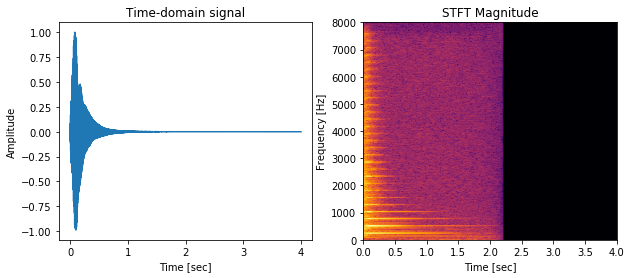

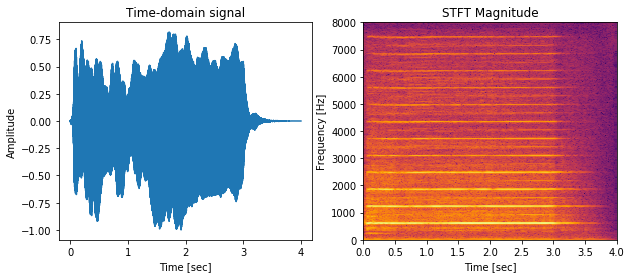

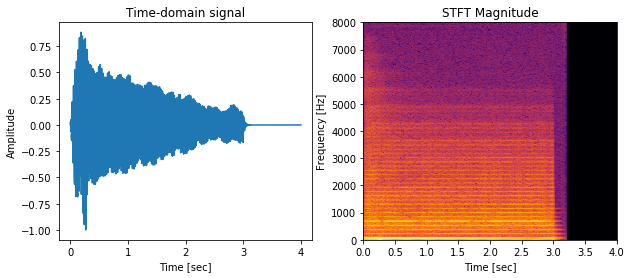

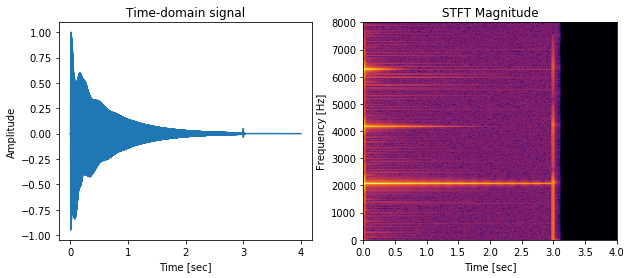

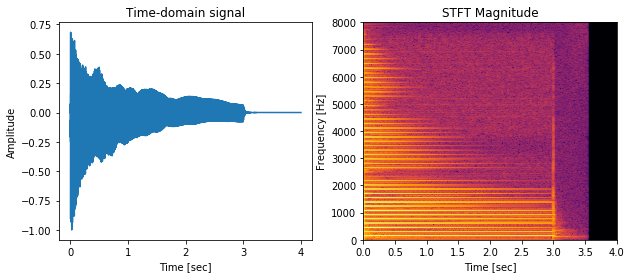

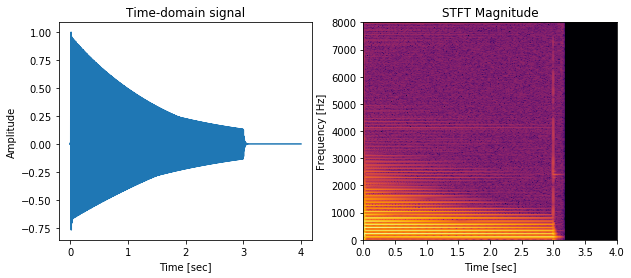

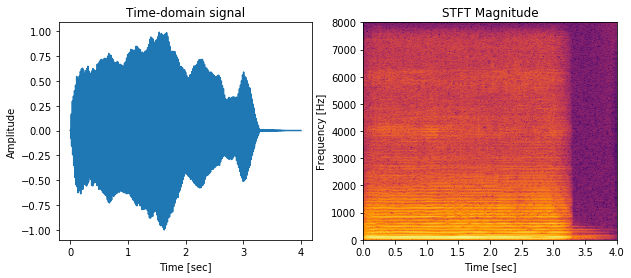

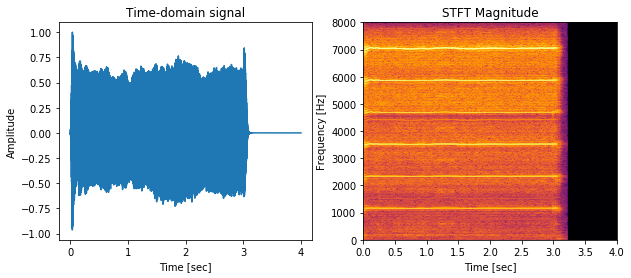

In [71]:
time_vector = np.arange(0, len(random_sounds[0])/sr, 1/sr)

for index, sound in enumerate(random_sounds):
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    axes[0].plot(time_vector, sound/np.max(np.abs(sound))) #plot normalized sound
    axes[0].set(xlabel='Time [sec]', ylabel='Amplitude',
           title='Time-domain signal')

    
    f, t, Zxx = sc.signal.stft(sound, fs=sr, nperseg=1024, noverlap=768)
    spectrogram = np.log10(np.abs(Zxx)+1e-12)
    axes[1].pcolormesh(t, f, spectrogram, vmin=-5, cmap='inferno')
    axes[1].set(xlabel='Time [sec]', ylabel='Frequency [Hz]',
       title='STFT Magnitude')
    plt.savefig('sound_representation_' + str(index) + '.png')
    plt.show()
    # plt.savefig('time_signal.png')
    
    